[1] 모듈 로딩 & 데이터 불러오기 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
import utils
import re

In [6]:
old_age_person = '../열정의2조/Data/고령인구비율_시도_시_군_구__2010~2024.xlsx'
young_age_person = '../열정의2조/Data/인구총 조사 청년비율 2015~2024.xlsx'
population_density = '../열정의2조/Data/인구밀도_인구주택총 2000~2023.xlsx'


old_DF = pd.read_excel(old_age_person)
young_DF = pd.read_excel(young_age_person)
population_DF = pd.read_excel(population_density)

c:\Users\KDT17\anaconda3\envs\PY39\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\KDT17\anaconda3\envs\PY39\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\KDT17\anaconda3\envs\PY39\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# [1] 고령화 비교 <hr>

In [7]:
utils.print_info(old_DF, 'old_DF')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정구역별(1)  19 non-null     object
 1   2010      19 non-null     object
 2   2010.1    19 non-null     object
 3   2010.2    19 non-null     object
 4   2011      19 non-null     object
 5   2011.1    19 non-null     object
 6   2011.2    19 non-null     object
 7   2012      19 non-null     object
 8   2012.1    19 non-null     object
 9   2012.2    19 non-null     object
 10  2013      19 non-null     object
 11  2013.1    19 non-null     object
 12  2013.2    19 non-null     object
 13  2014      19 non-null     object
 14  2014.1    19 non-null     object
 15  2014.2    19 non-null     object
 16  2015      19 non-null     object
 17  2015.1    19 non-null     object
 18  2015.2    19 non-null     object
 19  2016      19 non-null     object
 20  2016.1    19 non-null     object
 21  2016.2    19 non-n

In [8]:
old_DF.columns

Index(['행정구역별(1)', '2010', '2010.1', '2010.2', '2011', '2011.1', '2011.2',
       '2012', '2012.1', '2012.2', '2013', '2013.1', '2013.2', '2014',
       '2014.1', '2014.2', '2015', '2015.1', '2015.2', '2016', '2016.1',
       '2016.2', '2017', '2017.1', '2017.2', '2018', '2018.1', '2018.2',
       '2019', '2019.1', '2019.2', '2020', '2020.1', '2020.2', '2021',
       '2021.1', '2021.2', '2022', '2022.1', '2022.2', '2023', '2023.1',
       '2023.2', '2024', '2024.1', '2024.2'],
      dtype='object')

In [9]:
# 고령화 컬럼 명 변경
old_DF.rename(columns={'행정구역별(1)':'지역'},inplace=True)

# 고령화 인덱스 지정
old_DF.set_index('지역',inplace=True)

In [10]:
utils.print_info(old_DF,'old_DF')

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 행정구역별(1) to 제주특별자치도
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2010    19 non-null     object
 1   2010.1  19 non-null     object
 2   2010.2  19 non-null     object
 3   2011    19 non-null     object
 4   2011.1  19 non-null     object
 5   2011.2  19 non-null     object
 6   2012    19 non-null     object
 7   2012.1  19 non-null     object
 8   2012.2  19 non-null     object
 9   2013    19 non-null     object
 10  2013.1  19 non-null     object
 11  2013.2  19 non-null     object
 12  2014    19 non-null     object
 13  2014.1  19 non-null     object
 14  2014.2  19 non-null     object
 15  2015    19 non-null     object
 16  2015.1  19 non-null     object
 17  2015.2  19 non-null     object
 18  2016    19 non-null     object
 19  2016.1  19 non-null     object
 20  2016.2  19 non-null     object
 21  2017    19 non-null     object
 22  2017.1  19 non-null  

In [11]:
old_DF.head()

,2010,2010.1,2010.2,2011,2011.1,2011.2,2012,2012.1,2012.2,2013,...,2021.2,2022,2022.1,2022.2,2023,2023.1,2023.2,2024,2024.1,2024.2
지역,,,,,,,,,,,,,,,,,,,,,
행정구역별(1),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),...,전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명)
전국,10.9,5506352,50515666,11.2,5700972,50734284,11.7,5980060,50948272,12.2,...,51638809,18,9267290,51439038,19,9730411,51325329,20,10256782,51217221
서울특별시,9.7,1002770,10312545,10.2,1044750,10249679,10.8,1105583,10195318,11.5,...,9509458,17.6,1658207,9428372,18.5,1733580,9386034,19.4,1813648,9331828
부산광역시,11.3,401784,3567910,11.8,418043,3550963,12.5,442199,3538484,13.3,...,3350380,21.5,712412,3317812,22.6,745199,3293362,23.9,780576,3266598
대구광역시,10,252084,2511676,10.4,260038,2507271,10.9,274152,2505644,11.6,...,2385412,18.4,435698,2363691,19.6,466338,2374960,20.9,493256,2363629


In [12]:
# 행이랑 전국 컬럼별로 추출
data_old_DF = old_DF.loc[ '전국': , ::3 ]


In [14]:
# 원하는 행 데이터만 추출

data_old_DF = data_old_DF.iloc[1:8].astype('float')
# x 축에 년도
xData = data_old_DF.columns.astype('int')

print(xData)
data_old_DF

Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024],
      dtype='int32')


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
지역,,,,,,,,,,,,,,,
부산광역시,11.3,11.8,12.5,13.3,14.0,14.6,15.3,16.3,17.1,18.2,19.4,20.4,21.5,22.6,23.9
대구광역시,10.0,10.4,10.9,11.6,12.2,12.7,13.2,14.0,14.7,15.6,16.6,17.5,18.4,19.6,20.9
인천광역시,8.6,8.9,9.4,9.8,10.3,10.7,11.0,11.7,12.3,13.0,14.0,14.8,15.6,16.6,17.7
광주광역시,9.0,9.3,9.9,10.3,10.8,11.3,11.7,12.4,12.8,13.4,14.2,14.8,15.6,16.5,17.5
대전광역시,8.7,9.0,9.4,9.8,10.3,10.9,11.3,12.0,12.7,13.5,14.4,15.2,16.1,17.0,18.0
울산광역시,6.8,7.1,7.5,7.9,8.3,8.8,9.3,10.0,10.7,11.5,12.6,13.6,14.7,15.9,17.2


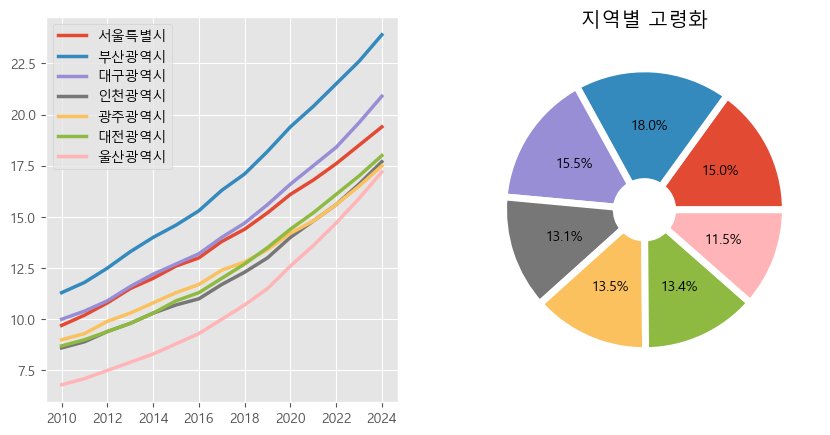

In [13]:
# y 축에 각지역별 고령화데이터 넣기

plt.figure(figsize=(10,5))
# 파이 그래프 원 가운데 공백주기
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}
pie_data = [] 
plt.style.use ('ggplot')
plt.subplot(1,2,1)

for i in data_old_DF.index:
    yData = data_old_DF.loc[i]
    pie_data.append(int(data_old_DF.loc[i].sum()))
    plt.grid(True, axis='y')
    plt.plot(xData, yData, label=i, linewidth=2.5)


plt.legend()

plt.subplot(1,2,2)
plt.pie(pie_data,  wedgeprops=wedgeprops, autopct='%.1f%%')
plt.title('지역별 고령화')
plt.show()


In [14]:
data_old_DF.columns

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

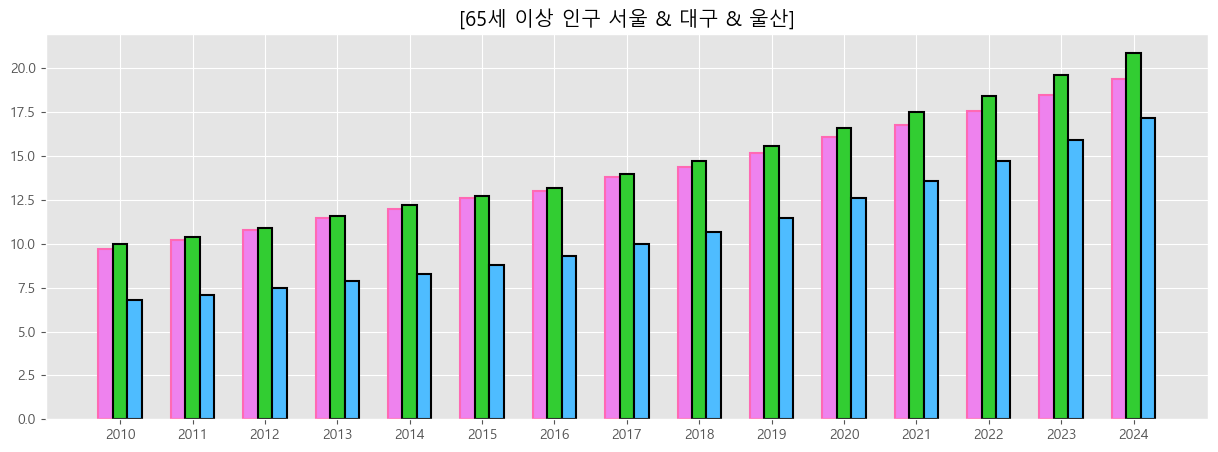

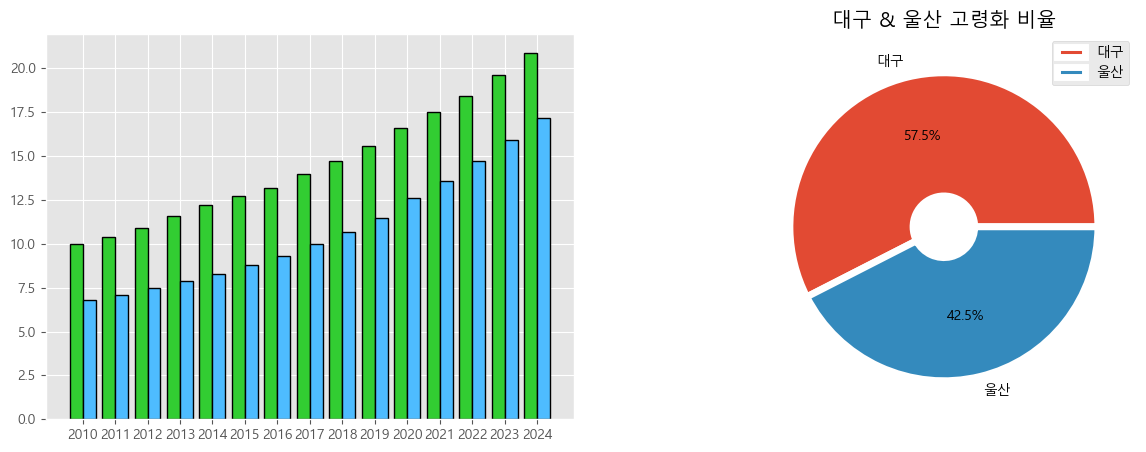

In [15]:
# 노인 인구비율

plt.figure(figsize=(15,5))

plt.title('[65세 이상 인구 서울 & 대구 & 울산]')

xData = data_old_DF.columns.astype('int')

yData1 = data_old_DF.loc['서울특별시']
yData2 = data_old_DF.loc['부산광역시']
yData3 = data_old_DF.loc['대구광역시']
yData4 = data_old_DF.loc['울산광역시']

plt.bar(xData-0.2,yData1, color='violet' , edgecolor='hotpink', linewidth=1.5,label='서울특별시', width=0.2)
plt.bar(xData,yData3, color='limegreen',  edgecolor='black', linewidth=1.5, label='대구광역시', width=0.2)
plt.bar(xData+0.2,yData4, color='#4ebcff',edgecolor='black', linewidth=1.5,  label='울산광역시', width=0.2)

plt.xticks(np.arange(2010,2025,1))
plt.show()


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
#plt.bar(xData-0.2,yData2, color='violet' , edgecolor='hotpink', linewidth=1.5,label='부산광역시', width=0.2)
plt.bar(xData-0.2,yData3, color='limegreen',  edgecolor='black', linewidth=1, label='대구광역시', width=0.4)
plt.bar(xData+0.2,yData4, color='#4ebcff',edgecolor='black', linewidth=1,  label='울산광역시', width=0.4)
plt.xticks(np.arange(2010,2025,1))

wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 5}

yData3 = int(data_old_DF.loc['대구광역시'].sum())
yData4 = int(data_old_DF.loc['울산광역시'].sum())
labels = ['대구','울산']
pie_data =[yData3, yData4]
plt.subplot(1,2,2)
plt.pie(pie_data,labels=labels, wedgeprops=wedgeprops,autopct='%.1f%%')
plt.title('대구 & 울산 고령화 비율')

plt.legend()
plt.show()

# [2] 젋은 연령층 비교

In [16]:
young_DF

,행정구역별(1),2015,2015.1,2015.2,2015.3,2015.4,2015.5,2015.6,2015.7,2015.8,...,2022.8,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8
0,행정구역별(1),주지표,주지표,주지표,보조지표1(청년기본법 상 청년인구),보조지표1(청년기본법 상 청년인구),보조지표1(청년기본법 상 청년인구),보조지표2(여성청년인구비율),보조지표2(여성청년인구비율),보조지표2(여성청년인구비율),...,보조지표2(여성청년인구비율),주지표,주지표,주지표,보조지표1(청년기본법 상 청년인구),보조지표1(청년기본법 상 청년인구),보조지표1(청년기본법 상 청년인구),보조지표2(여성청년인구비율),보조지표2(여성청년인구비율),보조지표2(여성청년인구비율)
1,행정구역별(1),청년인구비율(19~39세) (%),청년인구(19~39세) (명),전체인구 (명),청년인구비율(19~34세) (%),청년인구(19~34세) (명),전체인구 (명),청년여성비율(19~39세) (%),청년여성인구(19~39세) (명),전체인구 (명),...,전체인구 (명),청년인구비율(19~39세) (%),청년인구(19~39세) (명),전체인구 (명),청년인구비율(19~34세) (%),청년인구(19~34세) (명),전체인구 (명),청년여성비율(19~39세) (%),청년여성인구(19~39세) (명),전체인구 (명)
2,전국,29.8,15216963,51069375,22.1,11290101,51069375,14.2,7231823,51069375,...,51692272,26.8,13875399,51774521,20.4,10541492,51774521,12.6,6534466,51774521
3,서울특별시,32.8,3253436,9904312,24.8,2460025,9904312,16.4,1627593,9904312,...,9417469,31.2,2931861,9384512,24.3,2277364,9384512,16.2,1515891,9384512
4,부산광역시,28.9,995507,3448737,21.7,749944,3448737,13.8,475722,3448737,...,3295760,25.1,823314,3279604,19.3,633070,3279604,12.1,396016,3279604
5,대구광역시,28.6,706317,2466052,21.4,527890,2466052,13.5,333149,2466052,...,2366852,25.3,600884,2379188,19.5,463817,2379188,11.8,281268,2379188
6,인천광역시,30.8,890270,2890451,22.7,656536,2890451,14.7,424873,2890451,...,2989125,27.3,825978,3025950,20.4,617475,3025950,12.9,390794,3025950
7,광주광역시,30.9,464716,1502881,23.1,346904,1502881,15.1,226774,1502881,...,1468972,27.7,403570,1457090,21.7,315907,1457090,13.3,193907,1457090
8,대전광역시,31.8,489197,1538394,24.2,372121,1538394,15.2,234403,1538394,...,1473662,29.5,434126,1470336,23.4,344757,1470336,13.9,204500,1470336
9,울산광역시,30.3,353496,1166615,22.3,259661,1166615,13.5,156934,1166615,...,1110516,24.8,275141,1107432,18.4,203784,1107432,10.7,118629,1107432


In [17]:
# 젋은 연령층 데이터 
# 필요한 데이터 => 청년인구비율(19~39세) (%) 
utils.print_info(young_DF, "young_DF")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 82 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정구역별(1)  20 non-null     object
 1   2015      20 non-null     object
 2   2015.1    20 non-null     object
 3   2015.2    20 non-null     object
 4   2015.3    20 non-null     object
 5   2015.4    20 non-null     object
 6   2015.5    20 non-null     object
 7   2015.6    20 non-null     object
 8   2015.7    20 non-null     object
 9   2015.8    20 non-null     object
 10  2016      20 non-null     object
 11  2016.1    20 non-null     object
 12  2016.2    20 non-null     object
 13  2016.3    20 non-null     object
 14  2016.4    20 non-null     object
 15  2016.5    20 non-null     object
 16  2016.6    20 non-null     object
 17  2016.7    20 non-null     object
 18  2016.8    20 non-null     object
 19  2017      20 non-null     object
 20  2017.1    20 non-null     object
 21  2017.2    20 non-n

In [18]:
# 컬럼 속성 년도만 뽑아내기 XXXX.1  컬럼들 제거
year_columns = sorted(set([col for col in young_DF.columns if re.fullmatch(r'\d{4}', col)]))

young_DF = young_DF[['행정구역별(1)'] + year_columns]
# 컬럼 이름 변경
young_DF.rename(columns={'행정구역별(1)':'지역'}, inplace=True)
young_DF.set_index('지역')

C:\Users\KDT17\AppData\Local\Temp\ipykernel_12512\4199823321.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_DF.rename(columns={'행정구역별(1)':'지역'}, inplace=True)


,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역,,,,,,,,,
행정구역별(1),주지표,주지표,주지표,주지표,주지표,주지표,주지표,주지표,주지표
행정구역별(1),청년인구비율(19~39세) (%),청년인구비율(19~39세) (%),청년인구비율(19~39세) (%),청년인구비율(19~39세) (%),청년인구비율(19~39세) (%),청년인구비율(19~39세) (%),청년인구비율(19~39세) (%),청년인구비율(19~39세) (%),청년인구비율(19~39세) (%)
전국,29.8,29.6,29.3,29.2,28.9,28.4,27.7,27.2,26.8
서울특별시,32.8,32.6,32.5,32.5,32.4,32.2,31.7,31.4,31.2
부산광역시,28.9,28.6,28.3,28,27.6,26.9,26.3,25.6,25.1
대구광역시,28.6,28.3,28,27.9,27.7,27.2,26.6,25.9,25.3
인천광역시,30.8,30.5,30.3,30,29.6,29,28.3,27.8,27.3
광주광역시,30.9,30.5,30.3,30.1,29.9,29.3,28.9,28.3,27.7
대전광역시,31.8,31.6,31.5,31.2,31,30.6,30.2,29.8,29.5


In [19]:
# 필요없는 인덱스 제거
young_DF = young_DF.drop([0])
young_DF = young_DF.drop([1])
young_DF

,지역,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,전국,29.8,29.6,29.3,29.2,28.9,28.4,27.7,27.2,26.8
3,서울특별시,32.8,32.6,32.5,32.5,32.4,32.2,31.7,31.4,31.2
4,부산광역시,28.9,28.6,28.3,28,27.6,26.9,26.3,25.6,25.1
5,대구광역시,28.6,28.3,28,27.9,27.7,27.2,26.6,25.9,25.3
6,인천광역시,30.8,30.5,30.3,30,29.6,29,28.3,27.8,27.3
7,광주광역시,30.9,30.5,30.3,30.1,29.9,29.3,28.9,28.3,27.7
8,대전광역시,31.8,31.6,31.5,31.2,31,30.6,30.2,29.8,29.5
9,울산광역시,30.3,30,29.4,29,28.4,27.5,26.4,25.4,24.8
10,세종특별자치시,33,33.2,32.4,32.1,31.5,30.6,29,28.6,27.7
11,경기도,30.7,30.4,30.2,30.1,29.8,29.5,28.8,28.1,27.7


In [20]:
# int 타입으로 변경
young_DF.set_index('지역', inplace=True)

young_DF = young_DF.astype('float')

In [21]:
young_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 전국 to 제주특별자치도
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2015    18 non-null     float64
 1   2016    18 non-null     float64
 2   2017    18 non-null     float64
 3   2018    18 non-null     float64
 4   2019    18 non-null     float64
 5   2020    18 non-null     float64
 6   2021    18 non-null     float64
 7   2022    18 non-null     float64
 8   2023    18 non-null     float64
dtypes: float64(9)
memory usage: 1.4+ KB


In [22]:
young_simple_df = young_DF.iloc[:8]

In [23]:
young_simple_df

,2015,2016,2017,2018,2019,2020,2021,2022,2023
지역,,,,,,,,,
전국,29.8,29.6,29.3,29.2,28.9,28.4,27.7,27.2,26.8
서울특별시,32.8,32.6,32.5,32.5,32.4,32.2,31.7,31.4,31.2
부산광역시,28.9,28.6,28.3,28.0,27.6,26.9,26.3,25.6,25.1
대구광역시,28.6,28.3,28.0,27.9,27.7,27.2,26.6,25.9,25.3
인천광역시,30.8,30.5,30.3,30.0,29.6,29.0,28.3,27.8,27.3
광주광역시,30.9,30.5,30.3,30.1,29.9,29.3,28.9,28.3,27.7
대전광역시,31.8,31.6,31.5,31.2,31.0,30.6,30.2,29.8,29.5
울산광역시,30.3,30.0,29.4,29.0,28.4,27.5,26.4,25.4,24.8


In [24]:
young_simple_df.columns

Index(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object')

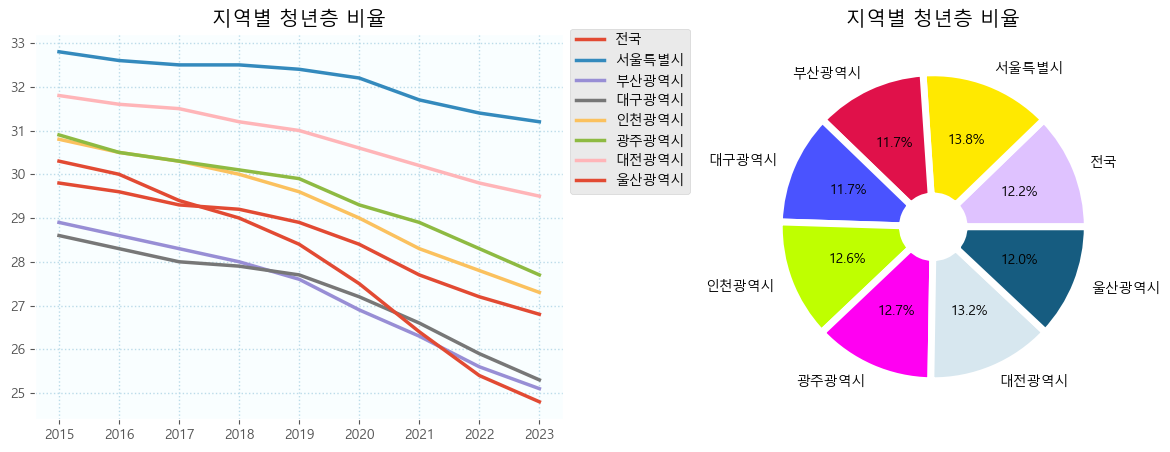

In [25]:
# 서울 & 대구 청년층 그래프

fig= plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.patch.set_facecolor('#f9feff')
young_xData = list(map(int, year_columns))

colors = ['#dfc2ff','#ffe900','#e0114a','#4a53ff','#bfff00','#ff00f2','#d7e7ef','#165c80']

# #bbdbe9', : 모양 점선, 굵기 = 2 지정
plt.grid(color = '#bbdbe9', linestyle = ':', linewidth = 1)

plt.title('지역별 청년층 비율')

pie_data = []


for i in young_simple_df.index:
    
    young_yData = young_simple_df.loc[i]

    plt.plot(young_xData, young_yData, label=i, linewidth=2.5)
    pie_data.append(int(young_simple_df.loc[i].sum()))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
   


plt.subplot(1,2,2)
plt.pie(pie_data, labels=young_simple_df.index, wedgeprops=wedgeprops,  colors=colors , autopct='%.1f%%')
plt.title('지역별 청년층 비율')

plt.show()

Text(0.5, 1.0, '대구 울산 청년층 비율')

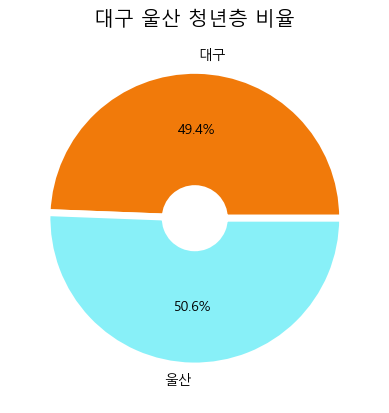

In [26]:
colors = ['#f17a0a','#88f0f8']
pie_data2 = [pie_data[3],pie_data[7]]
plt.pie(pie_data2 , labels=['대구','울산'],colors=colors, wedgeprops=wedgeprops, autopct='%.1f%%')
plt.title('대구 울산 청년층 비율')

# [3] 인구밀도 비교

In [27]:
population_DF.set_index('행정구역별',inplace=True)

In [28]:
population_DF

,2000,2005,2010,2015,2016,2017,2018,2019,2020,2021,2022,2023
행정구역별,,,,,,,,,,,,
전국,463.9,474.5,485.6,509.2,511.0,512.4,514.4,515.7,516.2,515.2,514.6,515.4
서울특별시,16342.2,16221,16188.9,16364.0,16202.2,16095.8,15983.7,15926.9,15839.0,15650.1,15560.7,15506.4
부산광역시,4820.4,4609.4,4452.3,4479.9,4468.8,4437.4,4409.8,4379.7,4348.9,4316.4,4272.8,4252.0
대구광역시,2801,2786.5,2767.4,2791.0,2785.3,2776.2,2766.7,2750.3,2728.6,2702.2,2673.7,1586.7
인천광역시,2566.2,2546.3,2587.5,2755.5,2741.4,2752.3,2761.4,2776.6,2765.1,2772.8,2801.3,2835.7
광주광역시,2697.8,2827.5,2945.6,2998.8,2995.7,2985.3,2973.2,2972.7,2948.5,2944.0,2931.9,2908.5
대전광역시,2534.5,2673,2781.2,2852.3,2846.9,2828.5,2801.0,2777.5,2758.1,2742.8,2730.7,2724.0
울산광역시,960.4,992.5,1022.3,1099.6,1099.2,1090.4,1083.4,1076.9,1069.0,1055.0,1044.9,1042.0
세종특별자치시,-,-,-,439.0,521.7,595.0,671.9,727.3,761.3,787.7,822.9,830.7


In [29]:
population_simple_DF = population_DF.iloc[:8]

In [30]:
population_simple_DF

,2000,2005,2010,2015,2016,2017,2018,2019,2020,2021,2022,2023
행정구역별,,,,,,,,,,,,
전국,463.9,474.5,485.6,509.2,511.0,512.4,514.4,515.7,516.2,515.2,514.6,515.4
서울특별시,16342.2,16221,16188.9,16364.0,16202.2,16095.8,15983.7,15926.9,15839.0,15650.1,15560.7,15506.4
부산광역시,4820.4,4609.4,4452.3,4479.9,4468.8,4437.4,4409.8,4379.7,4348.9,4316.4,4272.8,4252.0
대구광역시,2801,2786.5,2767.4,2791.0,2785.3,2776.2,2766.7,2750.3,2728.6,2702.2,2673.7,1586.7
인천광역시,2566.2,2546.3,2587.5,2755.5,2741.4,2752.3,2761.4,2776.6,2765.1,2772.8,2801.3,2835.7
광주광역시,2697.8,2827.5,2945.6,2998.8,2995.7,2985.3,2973.2,2972.7,2948.5,2944.0,2931.9,2908.5
대전광역시,2534.5,2673,2781.2,2852.3,2846.9,2828.5,2801.0,2777.5,2758.1,2742.8,2730.7,2724.0
울산광역시,960.4,992.5,1022.3,1099.6,1099.2,1090.4,1083.4,1076.9,1069.0,1055.0,1044.9,1042.0


In [31]:
population_simple_DF.drop(['전국'], inplace=True)

C:\Users\KDT17\AppData\Local\Temp\ipykernel_12512\2104839396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_simple_DF.drop(['전국'], inplace=True)


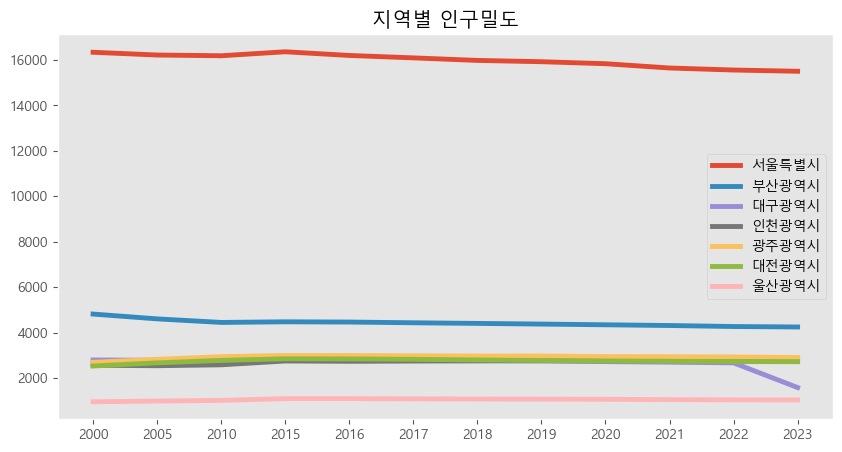

In [32]:
plt.figure(figsize=(10,5))

xData = population_simple_DF.columns

for i in  population_simple_DF.index:

    population_yData =population_simple_DF.loc[i]

    plt.plot(xData, population_yData,linewidth =3.5)


plt.title('지역별 인구밀도')
plt.grid()
plt.legend( labels = population_simple_DF.index)
plt.show()


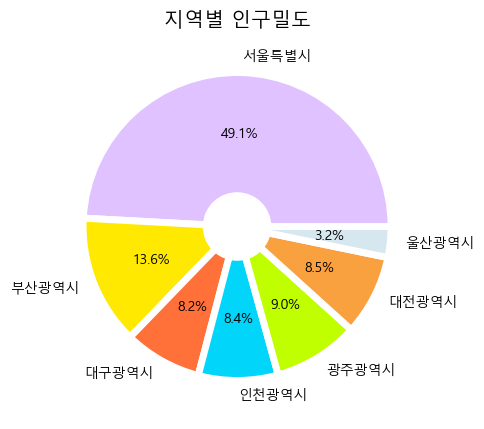

In [33]:
plt.figure(figsize=(10,5))

xData = population_simple_DF.columns
ydata = []
colors = ['#dfc2ff','#ffe900','#ff7139','#02d5fa','#bfff00','#f9a03f','#d7e7ef','#165c80']
for i in  population_simple_DF.index:

    	#f9a03f

    ydata.append(int(population_simple_DF.loc[i].sum()))


plt.pie(ydata, labels=population_simple_DF.index,wedgeprops=wedgeprops ,colors=colors, autopct='%.1f%%')

plt.title('지역별 인구밀도')
plt.grid()
# plt.legend( labels = population_simple_DF.index)
plt.show()

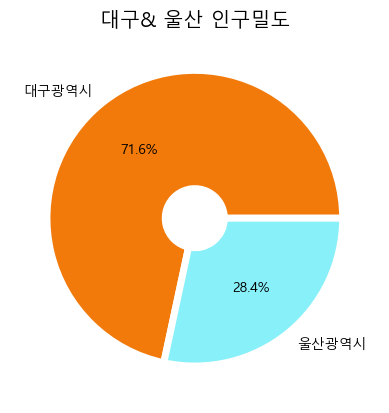

In [34]:
colors=['#f17a0a','#88f0f8']
a= int(population_simple_DF.loc['대구광역시'].sum())
b= int(population_simple_DF.loc['울산광역시'].sum())
pie_data5 =[a,b]
plt.pie(pie_data5, labels=['대구광역시','울산광역시'],wedgeprops=wedgeprops ,colors=colors, autopct='%.1f%%')
plt.title('대구& 울산 인구밀도')
plt.show()

# [4] 1인당 총 평균소득

In [35]:
data = '../데이터시각화 2조/Data/1인당_지역총소득_시도__2015~2023.xlsx'
capita_incomeDF = pd.read_excel(data)

In [36]:
capita_incomeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     7 non-null      object
 1   2015    7 non-null      int64 
 2   2016    7 non-null      int64 
 3   2017    7 non-null      int64 
 4   2018    7 non-null      int64 
 5   2019    7 non-null      int64 
 6   2020    7 non-null      int64 
 7   2021    7 non-null      int64 
 8   2022    7 non-null      int64 
 9   2023    7 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 688.0+ bytes


In [37]:
capita_incomeDF.head()
capita_incomeDF.set_index('시도별', inplace=True)

In [38]:
capita_incomeDF.columns

Index(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 2023], dtype='object')

In [39]:
capita_incomeDF

,2015,2016,2017,2018,2019,2020,2021,2022,2023
시도별,,,,,,,,,
서울특별시,45597,48496,50778,52690,53758,53474,59498,63778,65994
부산광역시,27678,28369,28776,29617,30892,31112,32832,34263,35373
대구광역시,25327,26455,27681,28554,29413,29509,31558,34000,34344
인천광역시,28319,30331,31520,32354,34160,34505,37828,39748,41203
광주광역시,26602,27895,29142,30657,32306,33187,34787,36826,38019
대전광역시,28460,29703,31906,32556,34444,35367,36934,39378,40976
울산광역시,50693,53523,52675,53566,54941,53378,57151,56854,60576


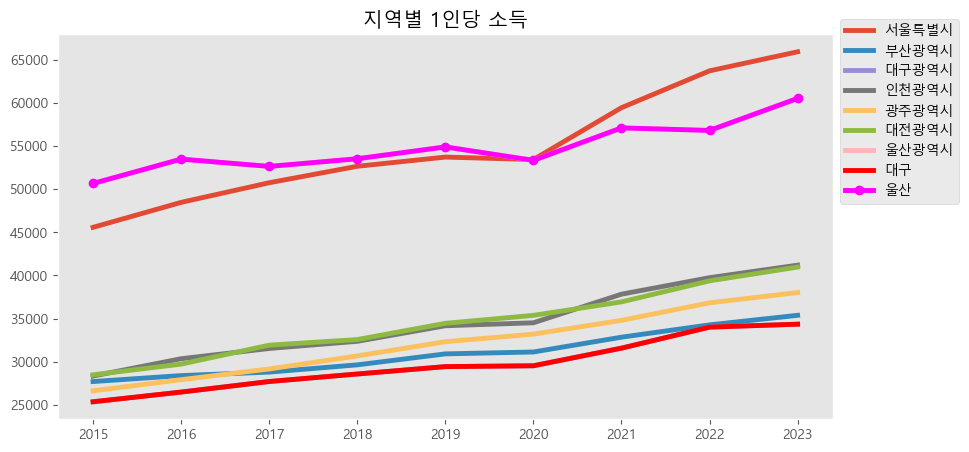

In [40]:
plt.figure(figsize=(10,5))

xData = capita_incomeDF.columns.astype('int')


for i in  capita_incomeDF.index:

    capita_yData = capita_incomeDF.loc[i]

    plt.plot(xData, capita_yData, label=i ,linewidth =3.5)



yData1 = capita_incomeDF.loc['대구광역시']
yData2 = capita_incomeDF.loc['울산광역시']

plt.plot(xData, yData1, label='대구', color ='red', linewidth =3.5)
plt.plot(xData, yData2, label='울산',marker='o', color='magenta',linewidth =3.5)


plt.title('지역별 1인당 소득')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.grid()
plt.show()

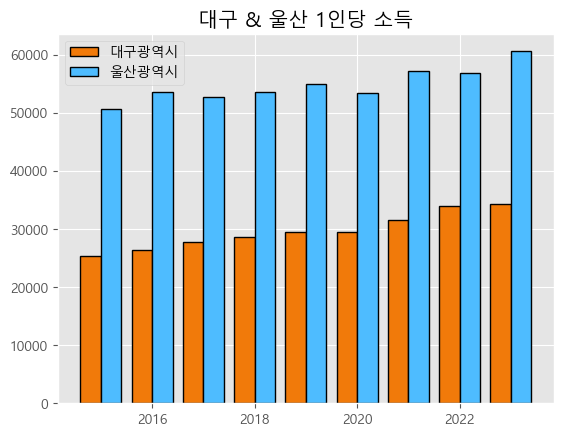

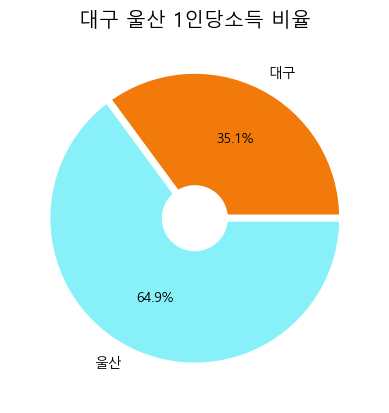

In [41]:
plt.bar(xData-0.2,yData1, color= '#f17a0a',  edgecolor='black', linewidth=1, label='대구광역시', width=0.4)
plt.bar(xData+0.2,yData2, color='#4ebcff',edgecolor='black', linewidth=1,  label='울산광역시', width=0.4)

plt.title('대구 & 울산 1인당 소득')
plt.legend()
plt.show()


colors = ['#f17a0a','#88f0f8']
pie_data3 = [yData1.sum(), yData2.sum()]
plt.pie(pie_data3 , labels=['대구','울산'],colors=colors, wedgeprops=wedgeprops, autopct='%.1f%%')
plt.title('대구 울산 1인당소득 비율')
plt.show()

# [5] 울산 & 대구 인구수 비교

In [42]:
data = '../데이터시각화 2조/Data/행정구역_시군구_총인구수_2015~2023.xlsx'

people_DF = pd.read_excel(data)

c:\Users\KDT17\anaconda3\envs\PY39\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [43]:
people_DF.rename(columns={'행정구역(시군구)별':'지역'}, inplace=True)
people_DF.set_index('지역')


,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
지역,,,,,,,,,,
행정구역(시군구)별,총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명),총인구수 (명)
서울특별시,10022181,9930616,9857426,9765623,9729107,9668465,9509458,9428372,9386034,9331828
부산광역시,3513777,3498529,3470653,3441453,3413841,3391946,3350380,3317812,3293362,3266598
대구광역시,2487829,2484557,2475231,2461769,2438031,2418346,2385412,2363691,2374960,2363629
인천광역시,2925815,2943069,2948542,2954642,2957026,2942828,2948375,2967314,2997410,3021010
울산광역시,1173534,1172304,1165132,1155623,1148019,1136017,1121592,1110663,1103661,1098049


In [44]:
deagu_people = people_DF.iloc[3]
ulsan_people = people_DF.iloc[5]

In [45]:
xData = people_DF.columns[1:].astype('int')

In [46]:
deagu_people.head()

지역        대구광역시
2015    2487829
2016    2484557
2017    2475231
2018    2461769
Name: 3, dtype: object

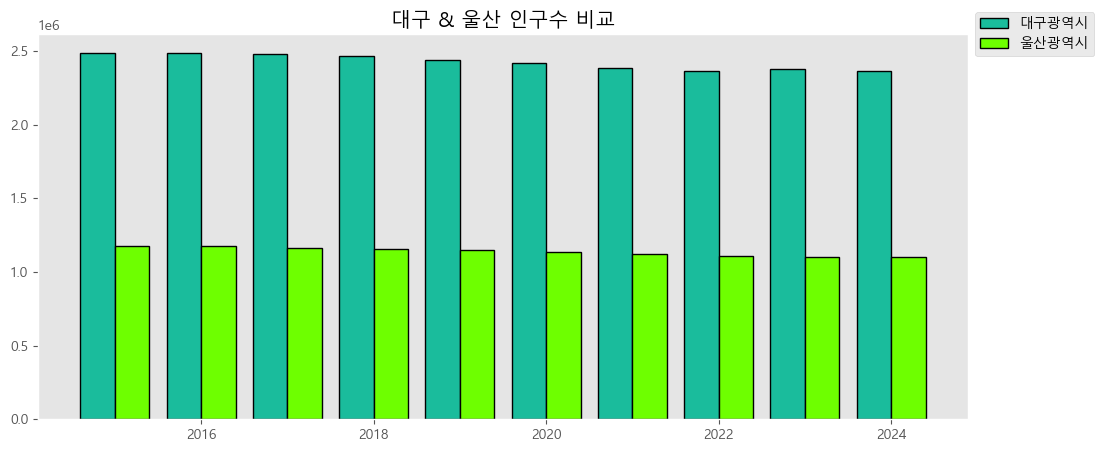

In [47]:
plt.figure(figsize=(12,5))

yData1s = deagu_people.iloc[1:].astype(dtype='int')
yData2d = ulsan_people.iloc[1:].astype(dtype='int')

#plt.plot(xData-0.2, yData1s, label='대구', color ='red',marker='o', linewidth =1.5)
#plt.plot(xData+0.2, yData2d, label='울산',marker='^', color='magenta',linewidth =2.0)

plt.bar(xData-0.2,yData1s, color='#1abc9c', edgecolor='black', label='대구광역시',width=0.4 ,linewidth=1 )

#plt.plot(xData+0.2,yData3, color='red',marker="o", label='서울특별시', linewidth=2)
plt.bar(xData+0.2,yData2d, color='#6eff00' ,edgecolor='black', label='울산광역시',width=0.4, linewidth=1 )

plt.grid()
plt.title(label='대구 & 울산 인구수 비교')
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()

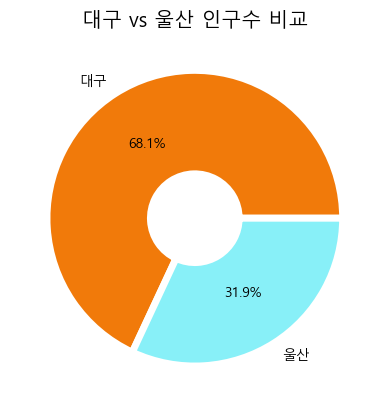

In [48]:
# 파이 그래프 원 가운데 공백주기
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
#'#a8e6cf','#ffaaa5'
colors = ['#f17a0a','#88f0f8']
pie_data4 = [yData1s.sum(),yData2d.sum()]

plt.pie(pie_data4 , labels=['대구','울산'],wedgeprops=wedgeprops,colors=colors, autopct='%.1f%%')
plt.title('대구 vs 울산 인구수 비교')
plt.show()

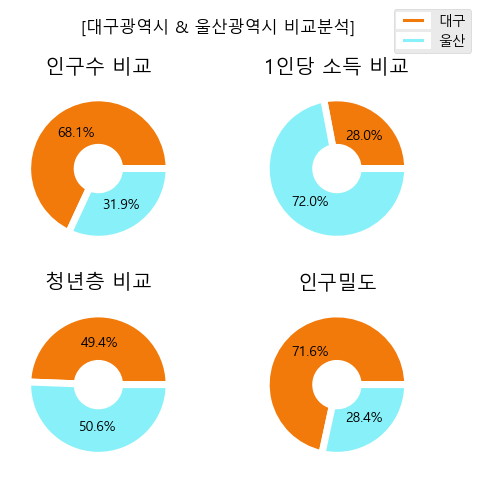

In [51]:
fig = plt.figure()
# 라벨설정
labels = ['대구', '울산']
# 컬러 지정

#colors = ['#a8e6cf','#ffaaa5']
colors = ['#f17a0a','#88f0f8']
# 파이 그래프 원 가운데 공백주기
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# 전체 주제 
plt.suptitle('[대구광역시 & 울산광역시 비교분석]')

# 2,2,1 좌표 설정
plot1 = plt.subplot(2,2,1)
ratio = [68.1, 31.9]
plot1.set_title('인구수 비교')
plt.pie(ratio,  colors = colors,wedgeprops=wedgeprops, autopct='%.1f%%')

plot2 = plt.subplot(2,2,2)
ratio2 = [2965,7623]
plot2.set_title('1인당 소득 비교')
plt.pie(ratio2, colors = colors, wedgeprops=wedgeprops,autopct='%.1f%%')
plt.tight_layout()

plot2 = plt.subplot(2,2,3)
ratio3 = [49.4, 50.6]
plot2.set_title('청년층 비교')
plt.pie(ratio3, colors = colors,wedgeprops=wedgeprops,autopct='%.1f%%')
plt.tight_layout()

plot2 = plt.subplot(2,2,4)
ratio4 = [71.6,28.4]
plot2.set_title('인구밀도')
plt.pie(ratio4, colors = colors,wedgeprops=wedgeprops,autopct='%.1f%%')





plt.tight_layout()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend( loc='right', labels=labels , bbox_to_anchor=(1.3, 2.5)) 
plt.show()

([<matplotlib.patches.Wedge at 0x1af5a151490>,
 [Text(-0.6904603922322764, 0.8563086165387168, ''),
  Text(0.6904603120588746, -0.8563086811842806, '')],
 [Text(-0.37661475939942346, 0.4670774272029364, '71.6%'),
  Text(0.376614715668477, -0.467077462464153, '28.4%')])

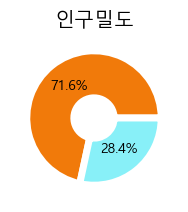

In [50]:
plot2 = plt.subplot(2,2,4)
ratio4 = [71.6,28.4]
plot2.set_title('인구밀도')
plt.pie(ratio4, colors = colors,wedgeprops=wedgeprops,autopct='%.1f%%')